In [8]:
import cv2
import numpy as np
import os

2. Fonctionnalités à implémenter
 2.1 Chargement d’une image
 Le programme doit :- charger une image depuis un fichier ;- vérifier que le fichier existe et gérer proprement les erreurs (chemin invalide, format non supporté, etc.)

In [11]:
def load_image(image_path):
    """Charge une image et vérifie son existence."""
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Erreur : le fichier '{image_path}' est introuvable.")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Erreur : format d'image non supporté ou fichier corrompu.")

    return image

In [6]:
# image_path = "groupe.png"
# load_image(image_path)

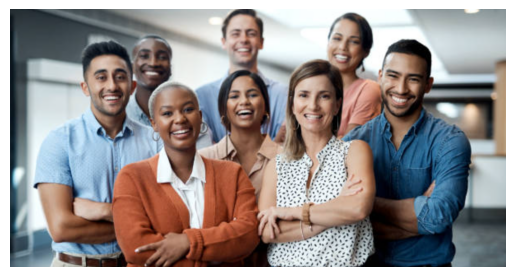

In [68]:
# import cv2
# import matplotlib.pyplot as plt

# image = cv2.imread("groupe.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plt.imshow(image)
# plt.axis("off")
# plt.show()

 2.2 Détection de visage (obligatoire avec OpenCV)
 La détection de visage doit obligatoirement être réalisée à l’aide d’OpenCV et d’un classifieur en cascade (Haar Cascade), par exemple : haarcascade_frontalface_default.xml.
 Le programme doit :- convertir l’image en niveaux de gris ;- appliquer le classifieur sur l’image ;- détecter un ou plusieurs visages ;- si aucun visage n’est détecté, afficher un message clair à l’utilisateur ;- si plusieurs visages sont détectés, traiter au minimum le premier visage détecté.d

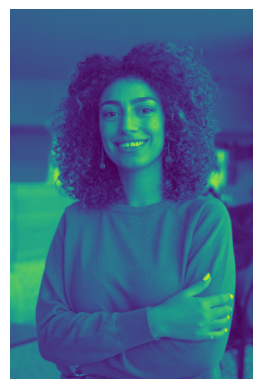

In [8]:
# import cv2
# import matplotlib.pyplot as plt

# image = cv2.imread("youssra.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plt.imshow(image)
# plt.axis("off")
# plt.show()

Avec cv2.COLOR_BGR2GRAY, OpenCV combine les trois canaux (B, G, R) en un seul canal de niveaux de gris selon une formule pondérée :

Y=0.299R+0.587G+0.114B

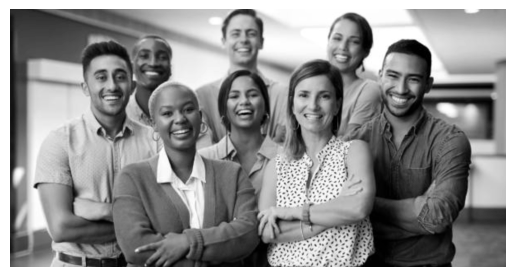

In [70]:
# import cv2
# import matplotlib.pyplot as plt

# image = cv2.imread("groupe.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plt.imshow(image, cmap='gray')  
# plt.axis("off")
# plt.show()

In [13]:
def detect_face(image):
    """Détecte un visage dans l'image avec Haar Cascade."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Chargement du classifieur Haar Cascade
    cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(cascade_path)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("Aucun visage détecté.")
        return None

    print(f"{len(faces)} visage(s) détecté(s).")
    return faces  #faces sont les bounding boxs  (qui délimite un visage dans l’image.)

detectMultiScale est une méthode de CascadeClassifier d’OpenCV.
Elle détecte des objets de différentes tailles dans une image (ici, des visages).

Elle renvoie une liste de rectangles (x, y, w, h) pour chaque visage détecté.

(x, y) : coordonnées du coin supérieur gauche

(w, h) : largeur et hauteur du rectangle

In [13]:
# image = cv2.imread("youssra.png")
# detect_face(image)

1 visage(s) détecté(s).


array([[105,  93, 112, 112]])

2.3 Isolement du visage
 À partir de la boîte englobante (bounding box) retournée par le détecteur, le programme doit :- extraire la région de l’image correspondant au visage (crop) ;- produire un tableau NumPy représentant uniquement le visage.
 Format attendu :- tableau NumPy de type numpy.ndarray ;- forme (hauteur, largeur, 3) pour une image couleur ;- type des valeurs : uint8 (0–255).

In [15]:
def extract_face(image, bbox):
    """Extrait le visage à partir des coordonnées du détecteur."""
    x, y, w, h = bbox  #bounding box  cad la boîte englobante  (qui délimite un visage dans l’image.) (faces)
    face = image[y:y+h, x:x+w]

    # Vérification de la forme
    if face.size == 0:
        raise ValueError("Erreur : extraction de visage vide.")

    print(f"Forme du visage isolé : {face.shape}")
    return face

x = position horizontale du coin haut-gauche du visage

y = position verticale du coin haut-gauche

w = largeur du rectangle

h = hauteur du rectangle

In [21]:
# image = cv2.imread("youssra.png")
# detect_face(image)

1 visage(s) détecté(s).


array([[105,  93, 112, 112]])

In [23]:
#image = cv2.imread("groupe.png")
#extract_face(image, detect_face(image))
bbox=detect_face(image)
print(bbox)
#extract_face(image, bbox)

1 visage(s) détecté(s).
[[105  93 112 112]]


In [25]:
image = cv2.imread("youssra.png")
bbox = detect_face(image)
print(bbox)

if bbox is not None:
    first_bbox = bbox[0]   # extraire la première boîte
    face = extract_face(image, first_bbox)
 

1 visage(s) détecté(s).
[[105  93 112 112]]
Forme du visage isolé : (112, 112, 3)


1 visage(s) détecté(s).
Visage 1 : shape = (112, 112, 3)


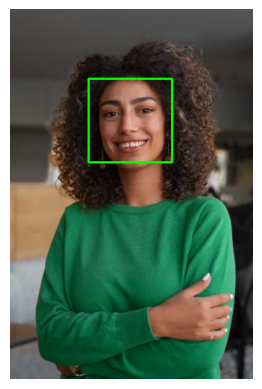

In [45]:
image = cv2.imread("youssra.png")
 
faces = detect_face(image)

for i, (x, y, w, h) in enumerate(faces):
    face = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print(f"Visage {i+1} : shape = {face.shape}")

# Afficher l'image avec tous les visages détectés
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


8 visage(s) détecté(s).
Visage 1 : shape = (85, 85, 3)
Visage 2 : shape = (86, 86, 3)
Visage 3 : shape = (96, 96, 3)
Visage 4 : shape = (91, 91, 3)
Visage 5 : shape = (111, 111, 3)
Visage 6 : shape = (118, 118, 3)
Visage 7 : shape = (108, 108, 3)
Visage 8 : shape = (106, 106, 3)


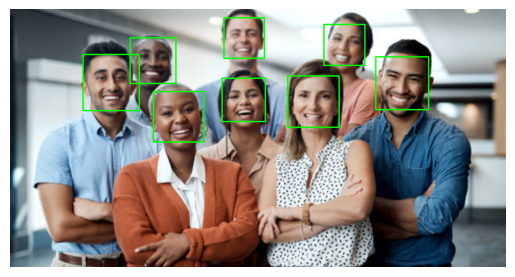

In [19]:
image = cv2.imread("groupe.png")
 
faces = detect_face(image)

for i, (x, y, w, h) in enumerate(faces):
    face = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print(f"Visage {i+1} : shape = {face.shape}")

# Afficher l'image avec tous les visages détectés
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
